In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

In [4]:
#read big uncleaned df

df_big = pd.read_csv('/Users/agorina/Desktop/Flatiron/recipes_nlp/overall_bbc.csv')
#df_big.drop('Unnamed: 0', axis=1, inplace=True)
df_big.head()

,recipe,type
0,25cm/10in sponge (cut from a large bought flan...,6
1,500g/1lb 2oz sausagemeat 450g/1lb self-raising...,6
2,450g/1lb self-raising flour 1 tsp baking powde...,6
3,175g/6oz plain flour 1 tsp baking powder 25g/1...,6
4,125g/4½oz plain flour 300g/10½oz caster sugar ...,6


In [5]:
#read smaller uncleaned df

df_small = pd.read_csv('/Users/agorina/Desktop/Flatiron/all_ingredients_ddna.csv')
df_small.drop('Unnamed: 0', axis=1, inplace=True)
df_small.head()

,Ingredients,Cuisine
0,"1 pound pork butt, cut into 1 inch cubes 1 tea...",1
1,"1 pound flank steak, thinly sliced 5 tablespoo...",1
2,"4 cups chicken broth, divided 1/8 teaspoon gro...",1
3,"1 1/2 pounds beef top sirloin, thinly sliced 1...",1
4,1 pound round steak 4 tablespoons soy sauce 4 ...,1


In [6]:
df_big.rename(columns={'recipe': 'Ingredients', 'type': 'Cuisine'}, inplace=True)

In [8]:
frames = [df_big, df_small]
dirty_df = pd.concat(frames, ignore_index=True)
dirty_df.shape

(2413, 2)

In [10]:
#dirty_df.to_csv('/Users/agorina/Desktop/Flatiron/concat_uncleaned_recipes.csv')

In [11]:
dirty_df['Cuisine'].value_counts()

7     454
3     436
5     367
9     299
6     254
8     157
2     138
4      86
13     83
11     45
1      32
10     32
12     30
Name: Cuisine, dtype: int64

In [12]:
def clean_strings(string):
    #tokenize
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_string = tokenizer.tokenize(string)
    
    #lower
    lowered_string = [word.lower() for word in tokenized_string]
    
    #lemmatization
    lemmatizer = WordNetLemmatizer() 
    lemmatized_string = [lemmatizer.lemmatize(word) for word in lowered_string]
    
    #filter stop words
    stop_words=set(stopwords.words("english"))
    filtered_string = [word for word in lemmatized_string if word not in stop_words]
   
    #remove custom stop words
    custom_stop_words = ['inch', 'ounce', 'pound', 'pounds', 'teaspoon', 'tablespoon', 'cup', 'small', 'medium', 'large', 'oz', 'lb', 'lbs', 'g', 'kg', 'gram', 'grams', 'cm', 'chopped', 'tbsp', 'tsp', 'ml', 'l', 'tsp', 'fl']
    cleaned_string = [word for word in filtered_string if word not in custom_stop_words]
    
    return cleaned_string

In [13]:
dirty_df.dropna(axis=0, inplace=True)

In [14]:
dirty_df['Ingredients'] = dirty_df.apply(lambda row: clean_strings(row['Ingredients']), axis=1)

In [15]:
dirty_df.head()

,Ingredients,Cuisine
0,"[sponge, cut, bought, flan, case, caster, suga...",6
1,"[sausagemeat, self, raising, flour, baking, po...",6
2,"[self, raising, flour, baking, powder, ground,...",6
3,"[plain, flour, baking, powder, caster, sugar, ...",6
4,"[plain, flour, caster, sugar, free, range, egg...",6


In [16]:
#dirty_df.to_csv('/Users/agorina/Desktop/Flatiron/concat_Cleaned_recipes.csv')

In [3]:
cdf = pd.read_csv('/Users/agorina/Desktop/Flatiron/recipes_nlp/concat_Cleaned_recipes.csv')
cdf.drop('Unnamed: 0', axis=1, inplace=True)
cdf.head()

,Ingredients,Cuisine
0,"['sponge', 'cut', 'bought', 'flan', 'case', 'c...",6
1,"['sausagemeat', 'self', 'raising', 'flour', 'b...",6
2,"['self', 'raising', 'flour', 'baking', 'powder...",6
3,"['plain', 'flour', 'baking', 'powder', 'caster...",6
4,"['plain', 'flour', 'caster', 'sugar', 'free', ...",6


In [4]:
cdf = cdf[(cdf.Cuisine != 1)]
cdf.shape
cdf.head()

,Ingredients,Cuisine
0,"['sponge', 'cut', 'bought', 'flan', 'case', 'c...",6
1,"['sausagemeat', 'self', 'raising', 'flour', 'b...",6
2,"['self', 'raising', 'flour', 'baking', 'powder...",6
3,"['plain', 'flour', 'baking', 'powder', 'caster...",6
4,"['plain', 'flour', 'caster', 'sugar', 'free', ...",6


In [12]:
type(cdf.Ingredients.values[1])

str

In [5]:
def vectorize(df):
    docs = df.Ingredients.values
    vec = CountVectorizer(stop_words=None)
    X = vec.fit_transform(docs)

    vdf = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
    return vdf.head(), vdf.columns

In [6]:
vdf = vectorize(cdf)
vdf

(   aburaage  according  accurate  achiote  acid  acidulated  across  acting  \
 0         0          0         0        0     0           0       0       0   
 1         0          0         0        0     0           0       0       0   
 2         0          0         0        0     0           0       0       0   
 3         0          0         0        0     0           0       0       0   
 4         0          0         0        0     0           0       0       0   
 
    action  active  ...  yolked  yorkshire  young  yukari  yuzu  zatar  zeera  \
 0       0       0  ...       0          0      0       0     0      0      0   
 1       0       0  ...       0          0      0       0     0      0      0   
 2       0       0  ...       0          0      0       0     0      0      0   
 3       0       0  ...       0          0      0       0     0      0      0   
 4       0       0  ...       0          0      0       0     0      0      0   
 
    zest  zested  zucchini  
 

In [7]:
def tf_idf(df):
    tf = TfidfVectorizer()
    text_tf = tf.fit_transform(df['Ingredients'])
    return text_tf.data

In [8]:
tfdf = tf_idf(cdf)
tfdf

array([0.11857825, 0.11815902, 0.09753168, ..., 0.22497804, 0.07282021,
       0.07758641])

In [20]:
cdf.head()

,Ingredients,Cuisine
0,"['sponge', 'cut', 'bought', 'flan', 'case', 'c...",6
1,"['sausagemeat', 'self', 'raising', 'flour', 'b...",6
2,"['self', 'raising', 'flour', 'baking', 'powder...",6
3,"['plain', 'flour', 'baking', 'powder', 'caster...",6
4,"['plain', 'flour', 'caster', 'sugar', 'free', ...",6


In [21]:
cdf['Cuisine'].value_counts()

7     454
3     436
5     367
9     299
6     254
8     157
2     137
4      86
13     83
11     45
10     32
12     30
Name: Cuisine, dtype: int64

In [9]:
def count_vectorize(df):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(df)
    return emb, count_vectorizer

In [10]:
vvdf = count_vectorize(cdf)
vvdf

(<2x2 sparse matrix of type '<class 'numpy.int64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                 lowercase=True, max_df=1.0, max_features=None, min_df=1,
                 ngram_range=(1, 1), preprocessor=None, stop_words=None,
                 strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, vocabulary=None))

In [11]:
list_corpus = cdf["Ingredients"].tolist()
list_labels = cdf["Cuisine"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=0)

X_train_counts, count_vectorizer = count_vectorize(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [12]:
def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=12)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','red', 'black','purple', 'green', 'darkgreen', 'yellow', 'pink', 'grey', 'darkblue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Mexican')
            blue_patch = mpatches.Patch(color='blue', label='Italian')
            red_patch = mpatches.Patch(color='red', label='French')
            black_patch = mpatches.Patch(color='black', label='American')
            purple_patch = mpatches.Patch(color='purple', label='British')
            green_patch = mpatches.Patch(color='green', label='Chinese')
            darkgreen_patch = mpatches.Patch(color='darkgreen', label='Indian')
            yellow_patch = mpatches.Patch(color='yellow', label='Irish')
            pink_patch = mpatches.Patch(color='pink', label='Nordic')
            grey_patch = mpatches.Patch(color='grey', label='Pakinstani')
            darkblue_patch = mpatches.Patch(color='darkblue', label='Japanese')
            
            plt.legend(handles=[orange_patch, blue_patch, red_patch, black_patch, purple_patch, green_patch, darkgreen_patch, yellow_patch,  pink_patch, darkblue_patch], prop={'size': 10})

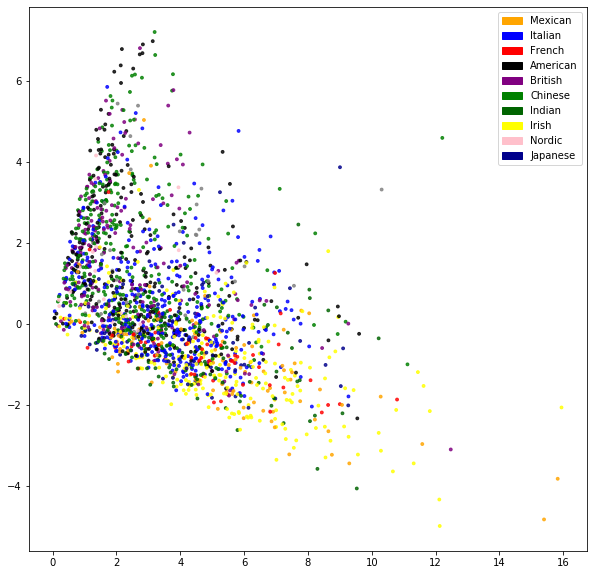

In [13]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [14]:
#east-west comparison
east_df = cdf[(cdf.Cuisine != 2) & (cdf.Cuisine != 3) & (cdf.Cuisine != 4) & (cdf.Cuisine != 5) & (cdf.Cuisine != 6) & (cdf.Cuisine != 7) & (cdf.Cuisine != 10) & (cdf.Cuisine != 11)]
west_df = cdf[(cdf.Cuisine != 8) & (cdf.Cuisine != 9) & (cdf.Cuisine != 12) & (cdf.Cuisine != 13)]

In [15]:
east_df.shape


(569, 2)

In [16]:
west_df.shape

(1811, 2)

In [17]:
list_corpus_e = east_df["Ingredients"].tolist()
list_labels_e = east_df["Cuisine"].tolist()

Xe_train, Xe_test, ye_train, ye_test = train_test_split(list_corpus_e, list_labels_e, test_size=0.2, 
                                                                                random_state=0)

Xe_train_counts, count_vectorizer = count_vectorize(Xe_train)
Xe_test_counts = count_vectorizer.transform(Xe_test)

In [18]:
def plot_LSA_e(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=12)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red', 'yellow', 'grey', 'pink']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            
            red_patch = mpatches.Patch(color='red', label='Chinese')
            
            yellow_patch = mpatches.Patch(color='yellow', label='Indian')
        
            grey_patch = mpatches.Patch(color='grey', label='Pakinstani')
            
            pink_patch = mpatches.Patch(color='pink', label='Japanese')
            
            plt.legend(handles=[red_patch, yellow_patch, grey_patch, pink_patch], prop={'size': 10})
            


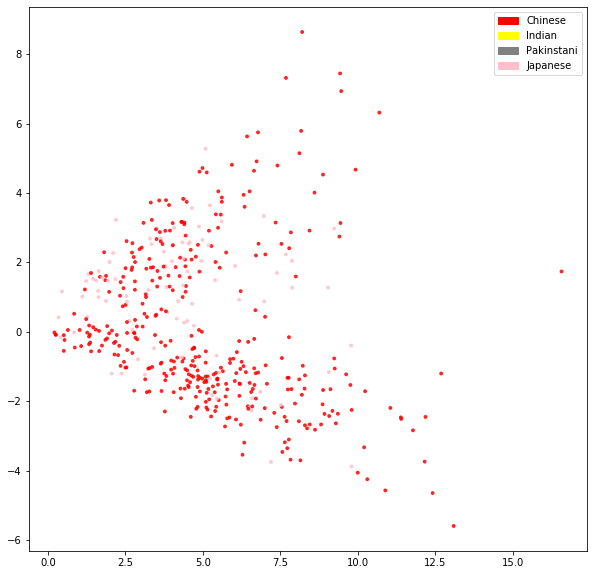

In [19]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA_e(Xe_train_counts, ye_train)
plt.show()

In [20]:
list_corpus_w = west_df["Ingredients"].tolist()
list_labels_w = west_df["Cuisine"].tolist()

Xw_train, Xw_test, yw_train, yw_test = train_test_split(list_corpus_w, list_labels_w, test_size=0.2, 
                                                                                random_state=0)

Xw_train_counts, count_vectorizer = count_vectorize(Xw_train)
Xw_test_counts = count_vectorizer.transform(Xw_test)

In [21]:
def plot_LSA_w(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=12)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','red', 'black','purple', 'yellow', 'pink']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Mexican')
            blue_patch = mpatches.Patch(color='blue', label='Italian')
            red_patch = mpatches.Patch(color='red', label='French')
            black_patch = mpatches.Patch(color='black', label='American')
            purple_patch = mpatches.Patch(color='purple', label='British')
            
            yellow_patch = mpatches.Patch(color='yellow', label='Irish')
            pink_patch = mpatches.Patch(color='pink', label='Nordic')
            
            
            plt.legend(handles=[orange_patch, blue_patch, red_patch, black_patch, purple_patch, yellow_patch, pink_patch], prop={'size': 10})
            
            

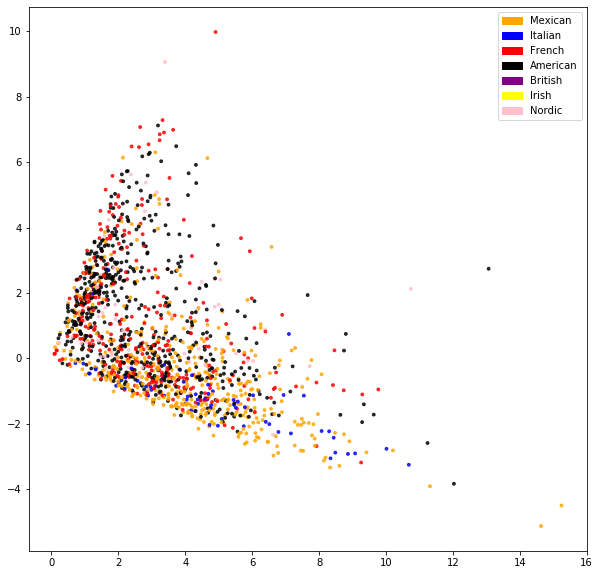

In [22]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA_w(Xw_train_counts, yw_train)
plt.show()

In [23]:
def tfidf(df):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(df)

    return train, tfidf_vectorizer

In [24]:
X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

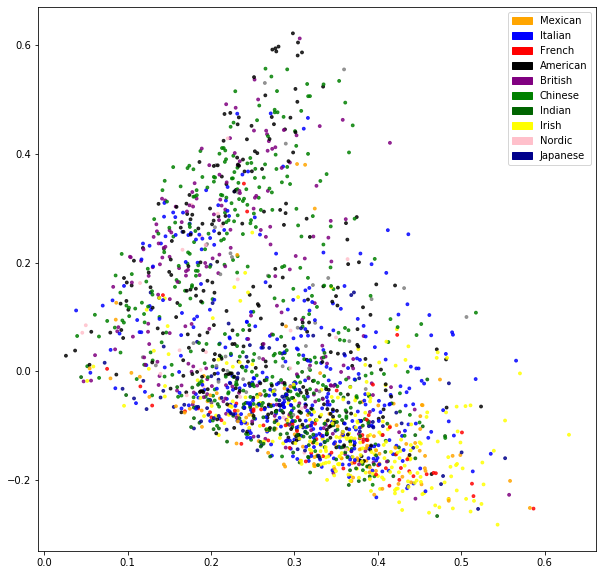

In [25]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [77]:
# my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']
# plt.figure(figsize=(10,4))
# df.tags.value_counts().plot(kind='bar');

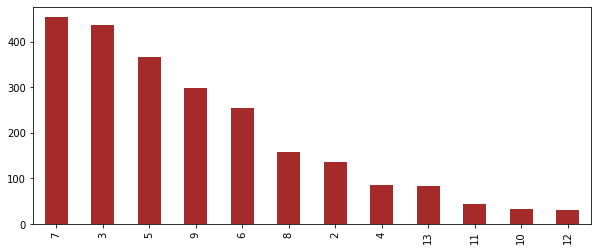

In [26]:
plt.figure(figsize=(10,4))
cdf.Cuisine.value_counts().plot(kind='bar', color='brown')

# -------------------------------------------------------------------------------------------

# Modeling

In [27]:
X = cdf.Ingredients
y = cdf.Cuisine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [28]:
cuisines = ['Mexican', 'Italian', 'African', 'French', 'American', 'British', 'Chinese', 'Indian', 'Irish', 'Nordic', 'Pakistani', 'Japanese']

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


# Naive Bayes

In [30]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=cuisines))


accuracy 0.5680672268907563
              precision    recall  f1-score   support

     Mexican       0.80      0.12      0.22        32
     Italian       0.50      0.86      0.63       111
     African       0.00      0.00      0.00        28
      French       0.46      0.28      0.35        78
    American       0.79      0.19      0.31        58
     British       0.53      0.74      0.62       131
     Chinese       0.76      0.83      0.79        35
      Indian       0.67      0.95      0.79        82
       Irish       0.00      0.00      0.00         5
      Nordic       0.00      0.00      0.00        12
   Pakistani       0.00      0.00      0.00         6
    Japanese       1.00      0.12      0.21        17

    accuracy                           0.57       595
   macro avg       0.46      0.34      0.33       595
weighted avg       0.56      0.57      0.50       595



/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM

In [31]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=cuisines))

accuracy 0.7075630252100841
              precision    recall  f1-score   support

     Mexican       0.87      0.84      0.86        32
     Italian       0.68      0.84      0.75       111
     African       0.81      0.61      0.69        28
      French       0.44      0.44      0.44        78
    American       0.71      0.50      0.59        58
     British       0.66      0.70      0.68       131
     Chinese       0.89      0.97      0.93        35
      Indian       0.87      0.99      0.93        82
       Irish       0.67      0.40      0.50         5
      Nordic       0.00      0.00      0.00        12
   Pakistani       0.00      0.00      0.00         6
    Japanese       0.80      0.71      0.75        17

    accuracy                           0.71       595
   macro avg       0.62      0.58      0.59       595
weighted avg       0.69      0.71      0.69       595



/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression

In [32]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=cuisines))

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.6621848739495798
              precision    recall  f1-score   support

     Mexican       0.82      0.72      0.77        32
     Italian       0.73      0.77      0.75       111
     African       0.70      0.57      0.63        28
      French       0.45      0.47      0.46        78
    American       0.53      0.52      0.52        58
     British       0.60      0.66      0.63       131
     Chinese       0.88      0.86      0.87        35
      Indian       0.82      0.88      0.85        82
       Irish       1.00      0.40      0.57         5
      Nordic       1.00      0.17      0.29        12
   Pakistani       0.00      0.00      0.00         6
    Japanese       0.69      0.65      0.67        17

    accuracy                           0.66       595
   macro avg       0.68      0.55      0.58       595
weighted avg       0.67      0.66      0.66       595



Throwing out underrepresented classes, Pakistani (12) and Nordic (11) and trying all the models once again

In [33]:
ccdf = cdf[(cdf.Cuisine != 1) & (cdf.Cuisine != 12) & (cdf.Cuisine != 11)]

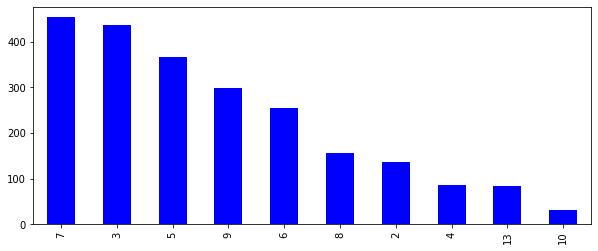

In [34]:
plt.figure(figsize=(10,4))
ccdf.Cuisine.value_counts().plot(kind='bar', color='blue')

In [38]:
cuisines_ = ['Mexican', 'Italian', 'African', 'French', 'American', 'British', 'Chinese', 'Indian', 'Irish', 'Japanese']
X_ = ccdf.Ingredients
y_ = ccdf.Cuisine
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.25, random_state = 42)

In [39]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train_, y_train_)

y_pred_ = nb.predict(X_test_)

print('accuracy %s' % accuracy_score(y_pred_, y_test_))
print(classification_report(y_test_, y_pred_, target_names=cuisines_))

accuracy 0.5753899480069324
              precision    recall  f1-score   support

     Mexican       0.80      0.12      0.22        32
     Italian       0.54      0.89      0.67       114
     African       0.00      0.00      0.00        30
      French       0.39      0.35      0.37        71
    American       0.70      0.11      0.18        66
     British       0.58      0.75      0.65       124
     Chinese       0.61      0.87      0.72        31
      Indian       0.70      0.96      0.81        77
       Irish       0.00      0.00      0.00         7
    Japanese       1.00      0.04      0.08        25

    accuracy                           0.58       577
   macro avg       0.53      0.41      0.37       577
weighted avg       0.57      0.58      0.50       577



/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
sgd = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])
sgd.fit(X_train_, y_train_)

y_pred_ = sgd.predict(X_test_)

print('accuracy %s' % accuracy_score(y_pred_, y_test_))
print(classification_report(y_test_, y_pred_, target_names=cuisines_))

accuracy 0.7227036395147314
              precision    recall  f1-score   support

     Mexican       0.82      0.88      0.85        32
     Italian       0.69      0.87      0.77       114
     African       0.96      0.73      0.83        30
      French       0.45      0.41      0.43        71
    American       0.85      0.42      0.57        66
     British       0.66      0.71      0.68       124
     Chinese       0.77      0.97      0.86        31
      Indian       0.86      0.97      0.91        77
       Irish       1.00      0.14      0.25         7
    Japanese       0.89      0.68      0.77        25

    accuracy                           0.72       577
   macro avg       0.80      0.68      0.69       577
weighted avg       0.73      0.72      0.71       577



In [42]:
logreg = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=1, C=1e5)),
              ])
logreg.fit(X_train_, y_train_)

y_pred_ = logreg.predict(X_test_)

print('accuracy %s' % accuracy_score(y_pred_, y_test_))
print(classification_report(y_test_, y_pred_, target_names=cuisines_))

accuracy 0.7279029462738301
              precision    recall  f1-score   support

     Mexican       0.82      0.84      0.83        32
     Italian       0.77      0.79      0.78       114
     African       1.00      0.83      0.91        30
      French       0.46      0.61      0.52        71
    American       0.61      0.56      0.58        66
     British       0.70      0.63      0.66       124
     Chinese       0.85      0.90      0.88        31
      Indian       0.95      0.95      0.95        77
       Irish       0.50      0.14      0.22         7
    Japanese       0.78      0.72      0.75        25

    accuracy                           0.73       577
   macro avg       0.74      0.70      0.71       577
weighted avg       0.74      0.73      0.73       577



/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Throw out US recipes since there's no such thing as american cuisine :)

In [57]:
cfcdf = ccdf[(ccdf.Cuisine != 6)]

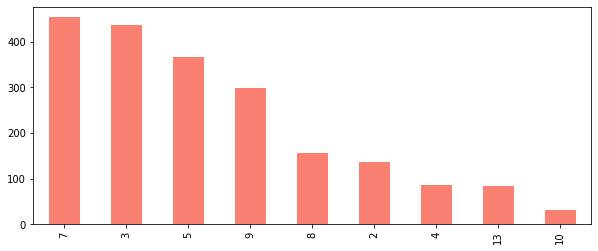

In [58]:
plt.figure(figsize=(10,4))
cfcdf.Cuisine.value_counts().plot(kind='bar', color='salmon')

In [59]:
_cuisines_ = ['Mexican', 'Italian', 'African', 'French', 'British', 'Chinese', 'Indian', 'Irish', 'Japanese']
_X_ = cfcdf.Ingredients
_y_ = cfcdf.Cuisine
_X_train_, _X_test_, _y_train_, _y_test_ = train_test_split(_X_, _y_, test_size=0.25, random_state = 42)

In [60]:
sgd = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])
sgd.fit(_X_train_, _y_train_)

_y_pred_ = sgd.predict(_X_test_)

print('accuracy %s' % accuracy_score(_y_pred_, _y_test_))
print(classification_report(_y_test_, _y_pred_, target_names=_cuisines_))

accuracy 0.7680311890838206
              precision    recall  f1-score   support

     Mexican       0.82      0.85      0.84        27
     Italian       0.74      0.80      0.77       112
     African       1.00      0.59      0.74        27
      French       0.51      0.58      0.54        76
     British       0.74      0.71      0.72       123
     Chinese       0.91      0.93      0.92        45
      Indian       0.91      0.99      0.95        72
       Irish       0.00      0.00      0.00         4
    Japanese       1.00      0.78      0.88        27

    accuracy                           0.77       513
   macro avg       0.74      0.69      0.71       513
weighted avg       0.77      0.77      0.77       513



/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
cdf.head()

,Ingredients,Cuisine
0,"['sponge', 'cut', 'bought', 'flan', 'case', 'c...",6
1,"['sausagemeat', 'self', 'raising', 'flour', 'b...",6
2,"['self', 'raising', 'flour', 'baking', 'powder...",6
3,"['plain', 'flour', 'baking', 'powder', 'caster...",6
4,"['plain', 'flour', 'caster', 'sugar', 'free', ...",6


# NN & GT

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [56]:
import networkx as nx

# NLG Markov chain

In [83]:
import markovify
import string
import re

In [102]:
rdf = pd.read_csv('/Users/agorina/Desktop/Flatiron/recipes_nlp/concat_uncleaned_recipes.csv')
rdf.drop('Unnamed: 0', axis=1, inplace=True)

rdf.dropna(inplace=True)
#rdf.isna().sum()
rdf.head()

,Ingredients,Cuisine
0,25cm/10in sponge (cut from a large bought flan...,6
1,500g/1lb 2oz sausagemeat 450g/1lb self-raising...,6
2,450g/1lb self-raising flour 1 tsp baking powde...,6
3,175g/6oz plain flour 1 tsp baking powder 25g/1...,6
4,125g/4½oz plain flour 300g/10½oz caster sugar ...,6


In [103]:
#string = rdf.Ingredients[0]

def strip_punct(string):
    no_punct_string = re.sub(r'[^\w\s]','', string)
    return no_punct_string

# for c in string.punctuation:
#     string = string.replace(c,"")


In [88]:
strip_punct(rdf.Ingredients[1])

'500g1lb 2oz sausagemeat 450g1lb selfraising flour 1 tsp baking powder pinch of salt 600ml20fl oz buttermilk 3 large freerange eggs separated 50g1¾oz butter melted plus extra for frying  maple syrup to serve '

In [104]:
rdf['Ingredients'] = rdf.apply(lambda row: strip_punct(row['Ingredients']), axis=1)

In [105]:
rdf.head()

,Ingredients,Cuisine
0,25cm10in sponge cut from a large bought flan c...,6
1,500g1lb 2oz sausagemeat 450g1lb selfraising fl...,6
2,450g1lb selfraising flour 1 tsp baking powder ...,6
3,175g6oz plain flour 1 tsp baking powder 25g1oz...,6
4,125g4½oz plain flour 300g10½oz caster sugar 10...,6


In [ ]:
#dirty_df['Ingredients'] = dirty_df.apply(lambda row: clean_strings(row['Ingredients']), axis=1)

In [106]:
text_model = markovify.NewlineText(rdf.Ingredients, state_size = 2)

In [112]:
for i in range(5):
    print(text_model.make_sentence())

300g10½oz wholemeal rye flour 200g strong white flour plus extra for greasing 
1 tbsp vegetable oil for frying 2 tsp curry powder ½ tsp ground ginger 
75g2½oz caster sugar 2 freerange eggs 8 thin slices 2 cloves garlic minced1 155 ounce can red kidney beans drained 1 15 ounce can chicken broth 12 cup cold unsalted butter softened 2 tsp wasabi paste light soy sauce 175 ml6fl oz chicken stock or bouillon powder 1 tsp chopped chives 1 tbsp chopped fresh mint 
1 tsp black mustard seeds pinch of salt 130g4¾oz strong white flour 1 small red onion cut into wedges 
200g7oz white sweet potatoes 12 10 inch flour tortillas9 ounces shredded Cheddar cheeseAdd all ingredients to list


In [125]:
most_meaningful = ['2 loins of lamb or mutton neck fillet diced 3 tbsp tomato purée 1 tbsp dill seeds 1 tsp sea salt plus extra leaves to serve salt and pepper',
                  '67oz pork chops bone in 1 tbsp ginger and garlic paste available from many Asian grocers 1 tsp sunflower oil 1 lemon juice 1 tbsp extra virgin olive oil',
                  '8oz selfraising flour 1 freerange egg whites whipped to soft peaks form when the whisk is removed',
                  '2 tbsp crème fraîche 300g 10½oz fettucine or tagliatelle cooked according to packet instructions']

In [126]:
funniest = ['675g 1½lb floury potatoes peeled and sliced reserving the seeds and stalks finely chopped garlic 2 tbsp white poppy seeds a little salt 2 garlic cloves roughly chopped to garnish',
            '2 Japanese aubergine cut into very small florets 1 garlic clove crushed',
           '3 espresso cups of olive oil 50g 1¾oz red onions finely chopped 125g 4½oz cabbage or spring onions finely chopped size of a whole nutmeg for dusting 400ml14floz double cream 4 tbsp vegetable oil 1 clove garlic peeled and chopped 3 tsp sesame oil to taste 1 ripe avocado halved and deveined but heads and shells washed and leaves separated',
           '200g 7oz white sweet potatoes 12 10 inch flour tortillas 9 ounces shredded Cheddar cheese']

In [135]:
fdf = pd.DataFrame(list(zip(most_meaningful, funniest)), columns = ['Most meaningful', 'Funniest'])

In [134]:
fdf

,Most meaningful,Funniest
0,2 loins of lamb or mutton neck fillet diced 3 ...,675g 1½lb floury potatoes peeled and sliced re...
1,67oz pork chops bone in 1 tbsp ginger and garl...,2 Japanese aubergine cut into very small flore...
2,8oz selfraising flour 1 freerange egg whites w...,3 espresso cups of olive oil 50g 1¾oz red onio...
3,2 tbsp crème fraîche 300g 10½oz fettucine or t...,200g 7oz white sweet potatoes 12 10 inch flour...


{TEST}

In [72]:
tdf = pd.read_csv('/Users/agorina/Desktop/abcnews-date-text.csv')
tdf.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [77]:
type(tdf.headline_text[0])

str

In [74]:
test_text_model = markovify.NewlineText(tdf.headline_text, state_size = 2)

In [75]:
for i in range(5):
    print(test_text_model.make_sentence())

uniting church opposes moves to qld bikie crackdown
two serious crashes in
gas leak forces residents out of new police policy
brisbane teacher jailed for stealing cars evading police
new calls for aged care resident death malanda


{/TEST}